In [49]:
import pandas as pd
import numpy as np

gold=pd.read_csv('gold_price.csv')
gold=gold.dropna()
print(gold.head())

          date  price
63  1968-04-01  37.70
64  1968-04-02  37.30
65  1968-04-03  37.60
66  1968-04-04  36.95
67  1968-04-05  37.00


In [50]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
gold = pd.read_csv('gold_price.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)

<ipython-input-50-3443fdb0bae4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [51]:
gold=gold.dropna()
print(gold.index)

DatetimeIndex(['1968-04-01', '1968-04-02', '1968-04-03', '1968-04-04',
               '1968-04-05', '1968-04-08', '1968-04-09', '1968-04-10',
               '1968-04-11', '1968-04-16',
               ...
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
               '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', name='date', length=13320, freq=None)


In [54]:
ts_gold=gold['price']

In [55]:
ts_gold.head()

date
1968-04-01    37.70
1968-04-02    37.30
1968-04-03    37.60
1968-04-04    36.95
1968-04-05    37.00
Name: price, dtype: float64

In [6]:
ts_gold['1975-07-23']

164.25

In [7]:
from datetime import datetime
ts_gold[datetime(1983,10,14)]

398.75

In [8]:
ts_gold['2000']

date
2000-01-04    281.50
2000-01-05    280.45
2000-01-06    279.40
2000-01-07    282.10
2000-01-10    281.60
               ...  
2000-12-19    269.55
2000-12-20    272.45
2000-12-21    273.10
2000-12-27    275.05
2000-12-28    274.45
Name: price, Length: 250, dtype: float64

In [9]:
ts_gold['1999-11']

date
1999-11-01    291.35
1999-11-02    290.75
1999-11-03    291.00
1999-11-04    290.60
1999-11-05    289.70
1999-11-08    288.25
1999-11-09    290.75
1999-11-10    295.75
1999-11-11    296.00
1999-11-12    291.25
1999-11-15    290.90
1999-11-16    294.25
1999-11-17    293.65
1999-11-18    293.60
1999-11-19    293.75
1999-11-22    294.90
1999-11-23    297.25
1999-11-24    297.50
1999-11-25    298.40
1999-11-26    296.85
1999-11-29    292.25
1999-11-30    291.35
Name: price, dtype: float64

In [10]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

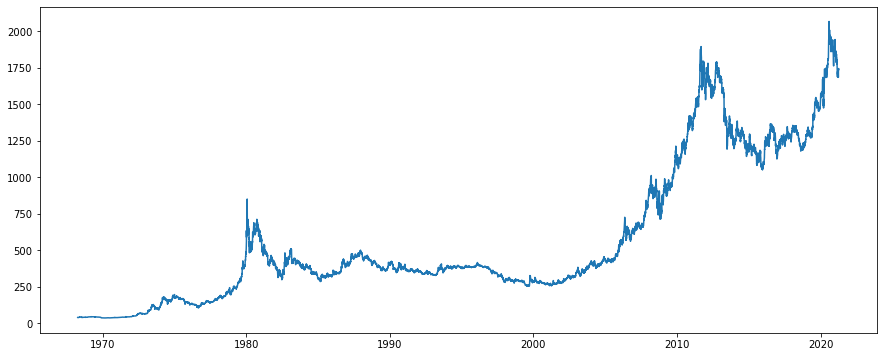

In [11]:
plt.plot(ts_gold)

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

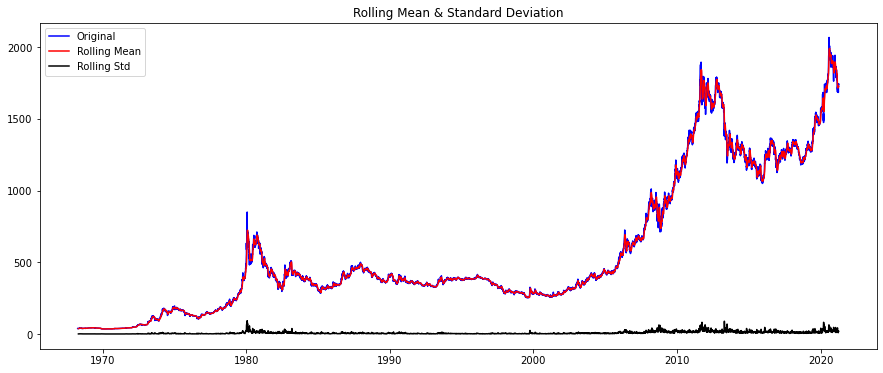

Results of Dickey-Fuller Test:
Test Statistic                     0.348388
p-value                            0.979459
#Lags Used                        39.000000
Number of Observations Used    13280.000000
Critical Value (1%)               -3.430843
Critical Value (5%)               -2.861758
Critical Value (10%)              -2.566886
dtype: float64


In [13]:
test_stationarity(ts_gold)

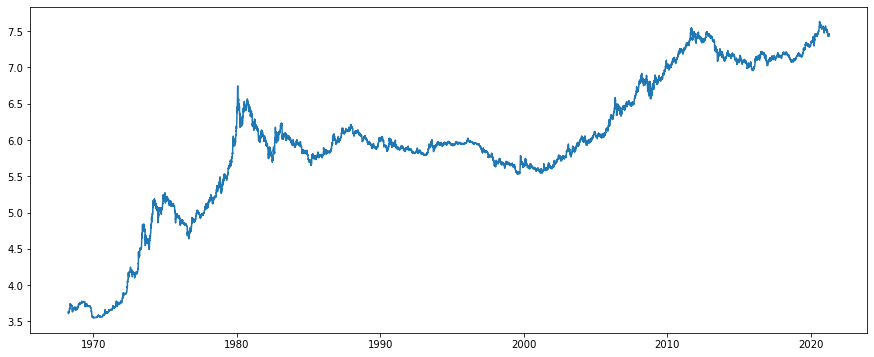

In [62]:
ts_log = np.log(ts_gold)
plt.plot(ts_log)

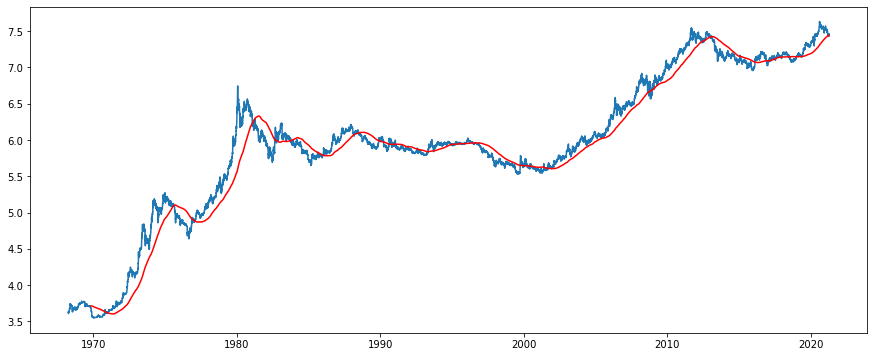

In [27]:
moving_avg = pd.Series(ts_log).rolling(window=400).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [28]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
1968-04-01   NaN
1968-04-02   NaN
1968-04-03   NaN
1968-04-04   NaN
1968-04-05   NaN
1968-04-08   NaN
1968-04-09   NaN
1968-04-10   NaN
1968-04-11   NaN
1968-04-16   NaN
1968-04-17   NaN
1968-04-18   NaN
Name: price, dtype: float64

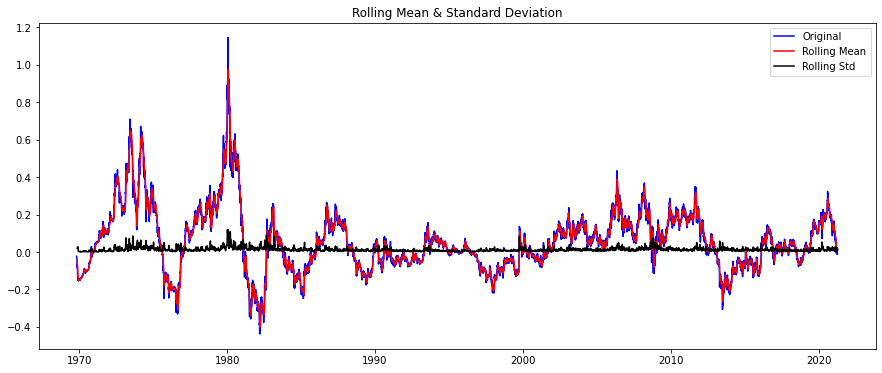

Results of Dickey-Fuller Test:
Test Statistic                    -4.422504
p-value                            0.000271
#Lags Used                        12.000000
Number of Observations Used    12908.000000
Critical Value (1%)               -3.430857
Critical Value (5%)               -2.861764
Critical Value (10%)              -2.566889
dtype: float64


In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

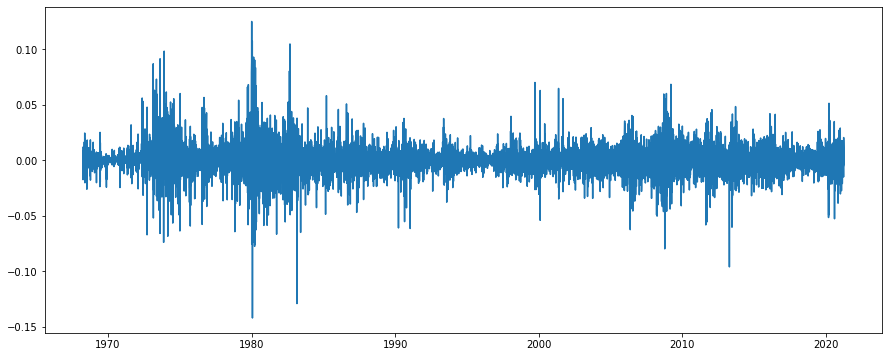

In [31]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

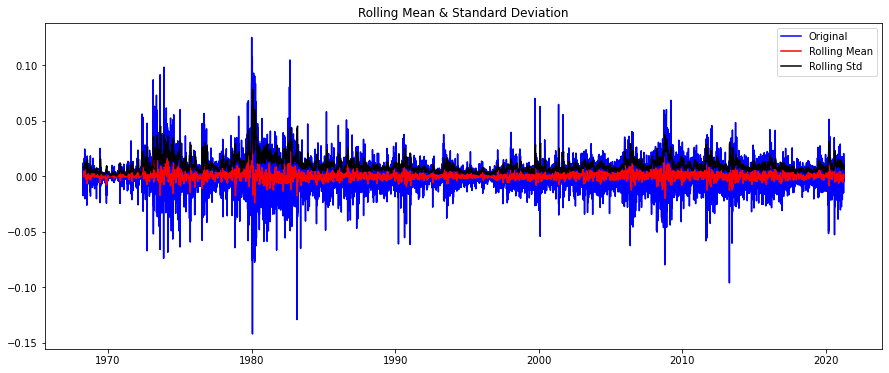

Results of Dickey-Fuller Test:
Test Statistic                   -31.530608
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    13307.000000
Critical Value (1%)               -3.430842
Critical Value (5%)               -2.861757
Critical Value (10%)              -2.566886
dtype: float64


In [32]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

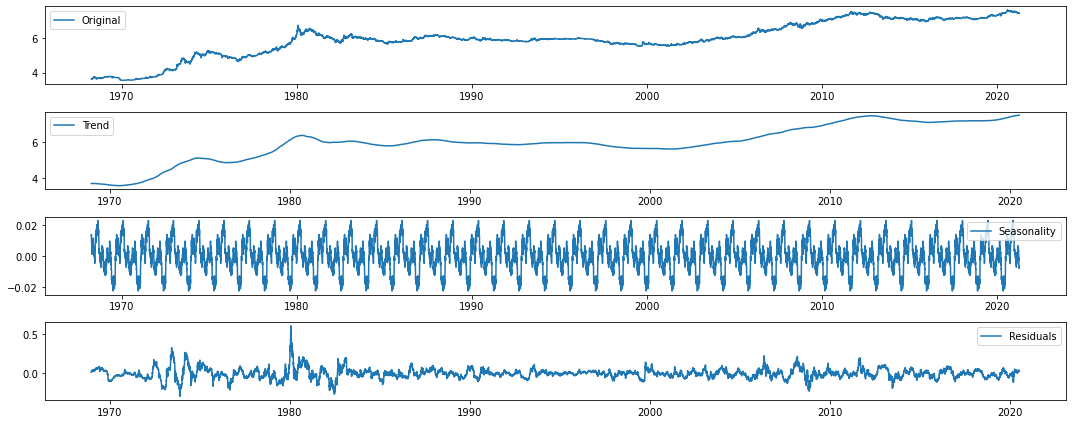

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

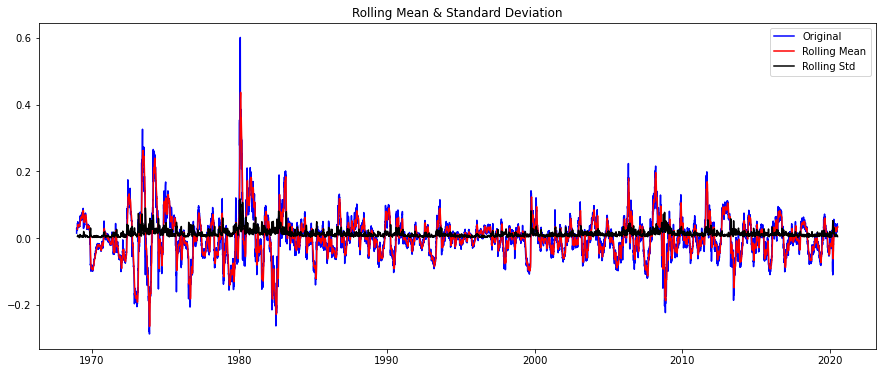

Results of Dickey-Fuller Test:
Test Statistic                -1.257012e+01
p-value                        2.012796e-23
#Lags Used                     3.900000e+01
Number of Observations Used    1.291600e+04
Critical Value (1%)           -3.430856e+00
Critical Value (5%)           -2.861764e+00
Critical Value (10%)          -2.566889e+00
dtype: float64


In [75]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


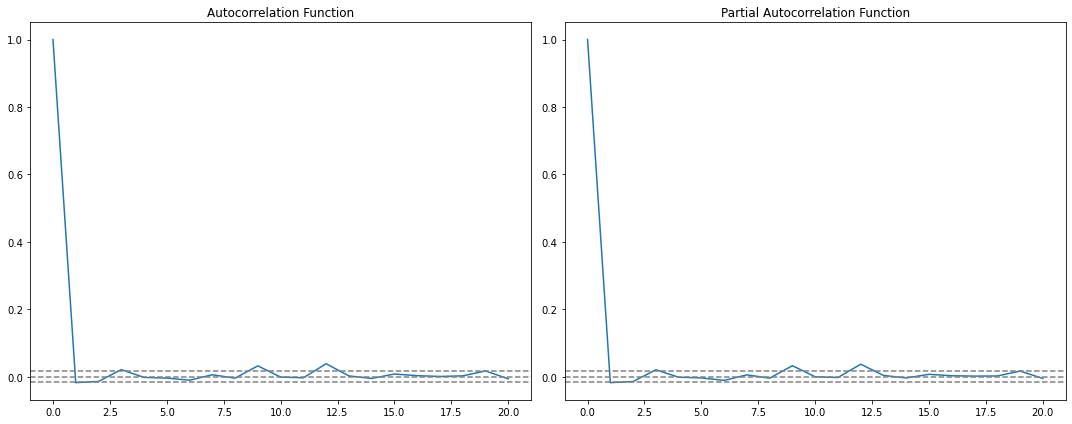

In [76]:
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

Text(0.5, 1.0, 'RSS: 1.9958')

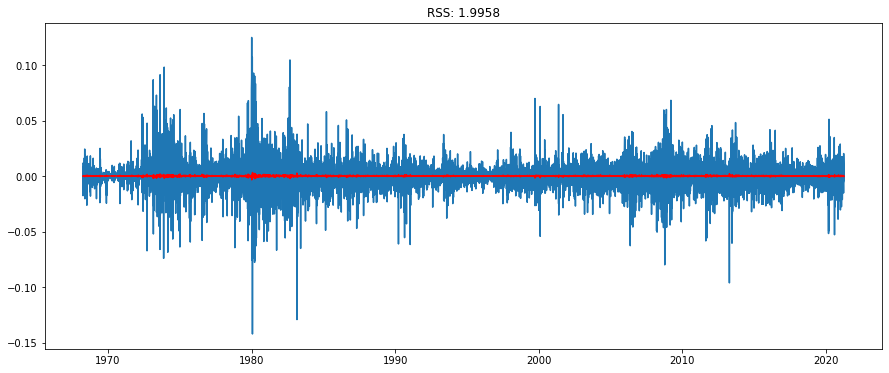

In [77]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0.5, 1.0, 'RSS: 1.9958')

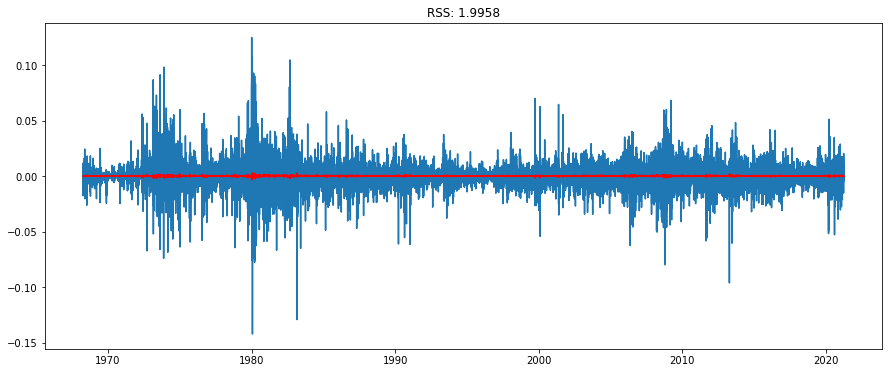

In [78]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence

Text(0.5, 1.0, 'RSS: 1.9935')

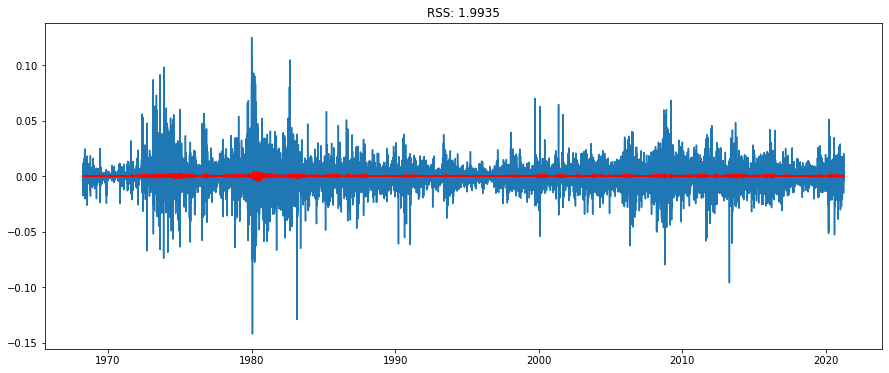

In [79]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [81]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
1968-04-02    0.000288
1968-04-03    0.000314
1968-04-04    0.000336
1968-04-05    0.000191
1968-04-08    0.000481
dtype: float64


In [82]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
1968-04-02    0.000288
1968-04-03    0.000602
1968-04-04    0.000938
1968-04-05    0.001130
1968-04-08    0.001611
dtype: float64


In [84]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
1968-04-01    3.629660
1968-04-02    3.629948
1968-04-03    3.630262
1968-04-04    3.630598
1968-04-05    3.630790
dtype: float64

Text(0.5, 1.0, 'RMSE: 237.4531')

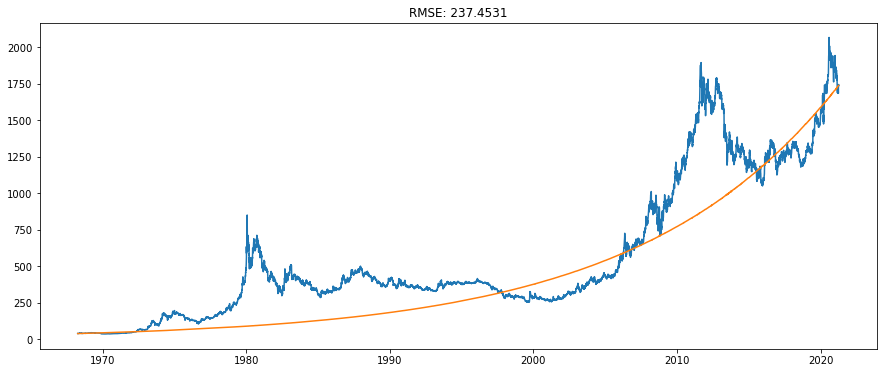

In [89]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_gold)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_gold)**2)/len(ts_gold)))